## Preparando e processando os dados

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://github.com/lukaswyllis/formacao-data-science/raw/refs/heads/master/dados-curso5/bicicletas.csv')
df.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04 01:00:00,138,NaN,NaN,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04 04:00:00,47,NaN,NaN,93.0,6.5,Céu limpo,Não,Sim,Inverno


In [3]:
df.shape

(17429, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17429 entries, 0 to 17428
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_hora         17429 non-null  object 
 1   contagem          17429 non-null  int64  
 2   temperatura       17406 non-null  float64
 3   sensacao_termica  17406 non-null  float64
 4   umidade           17429 non-null  float64
 5   velocidade_vento  17429 non-null  float64
 6   clima             17429 non-null  object 
 7   feriado           17429 non-null  object 
 8   fim_de_semana     17429 non-null  object 
 9   estacao           17429 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.3+ MB


In [5]:
df.isnull().sum()

,0
data_hora,0
contagem,0
temperatura,23
sensacao_termica,23
umidade,0
velocidade_vento,0
clima,0
feriado,0
fim_de_semana,0
estacao,0


In [6]:
df['temperatura'] = df['temperatura'].interpolate(method='linear')
df['sensacao_termica'] = df['sensacao_termica'].interpolate(method='linear')

In [7]:
df.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04 01:00:00,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04 02:00:00,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04 03:00:00,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04 04:00:00,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno


In [8]:
df.duplicated().sum()

np.int64(15)

In [9]:
duplicatas = df.duplicated(keep=False)

In [10]:
linhas_duplicadas = df[duplicatas]

In [11]:
linhas_duplicadas.sort_values('data_hora')

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
519,2015-01-25 16:00:00,1238,8.0,5.0,71.0,18.0,Nublado,Não,Sim,Inverno
17422,2015-01-25 16:00:00,1238,8.0,5.0,71.0,18.0,Nublado,Não,Sim,Inverno
869,2015-02-09 06:00:00,479,5.0,3.5,87.0,6.5,Parcialmente nublado,Não,Não,Inverno
17417,2015-02-09 06:00:00,479,5.0,3.5,87.0,6.5,Parcialmente nublado,Não,Não,Inverno
3655,2015-06-05 18:00:00,3411,23.0,23.0,50.0,26.0,Parcialmente nublado,Não,Não,Verão
17425,2015-06-05 18:00:00,3411,23.0,23.0,50.0,26.0,Parcialmente nublado,Não,Não,Verão
4167,2015-06-27 02:00:00,337,15.5,15.5,74.5,18.0,Parcialmente nublado,Não,Sim,Verão
17421,2015-06-27 02:00:00,337,15.5,15.5,74.5,18.0,Parcialmente nublado,Não,Sim,Verão
4658,2015-07-17 14:00:00,1882,24.5,24.5,44.0,29.5,Parcialmente nublado,Não,Não,Verão
17418,2015-07-17 14:00:00,1882,24.5,24.5,44.0,29.5,Parcialmente nublado,Não,Não,Verão


In [12]:
df_limpo = df.drop_duplicates()

## Explorando os dados numéricos

In [13]:
df_limpo.describe()

,contagem,temperatura,sensacao_termica,umidade,velocidade_vento
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468206,11.521080,72.324954,15.913063
std,1085.108068,5.571670,6.614799,14.313186,7.894570
min,0.000000,-1.500000,-6.000000,20.500000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000
max,7860.000000,34.000000,34.000000,100.000000,56.500000


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

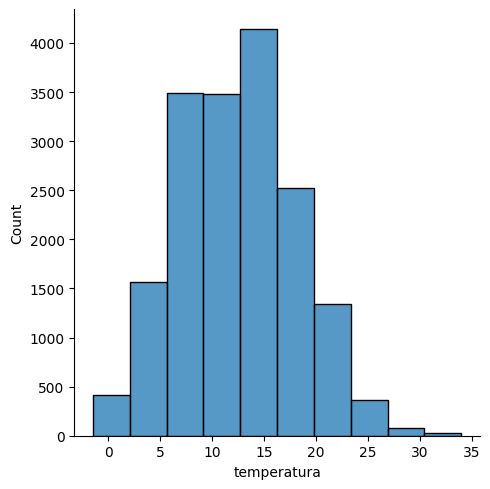

In [15]:
sns.displot(data=df_limpo, x='temperatura', bins=10)
plt.show()

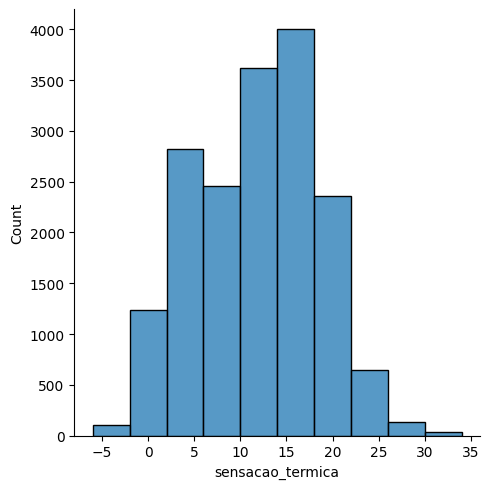

In [16]:
sns.displot(data=df_limpo, x='sensacao_termica', bins=10)
plt.show()

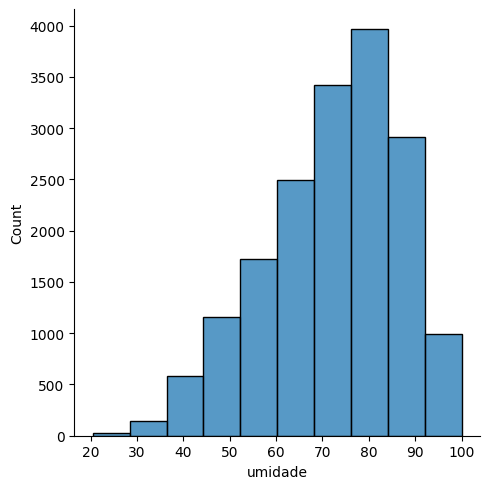

In [17]:
sns.displot(data=df_limpo, x='umidade', bins=10)
plt.show()

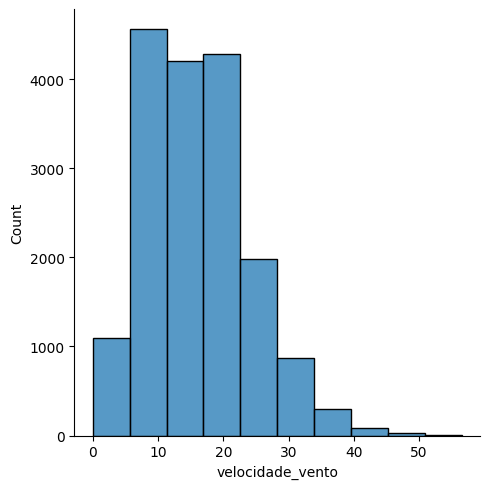

In [18]:
sns.displot(data=df_limpo, x='velocidade_vento', bins=10)
plt.show()

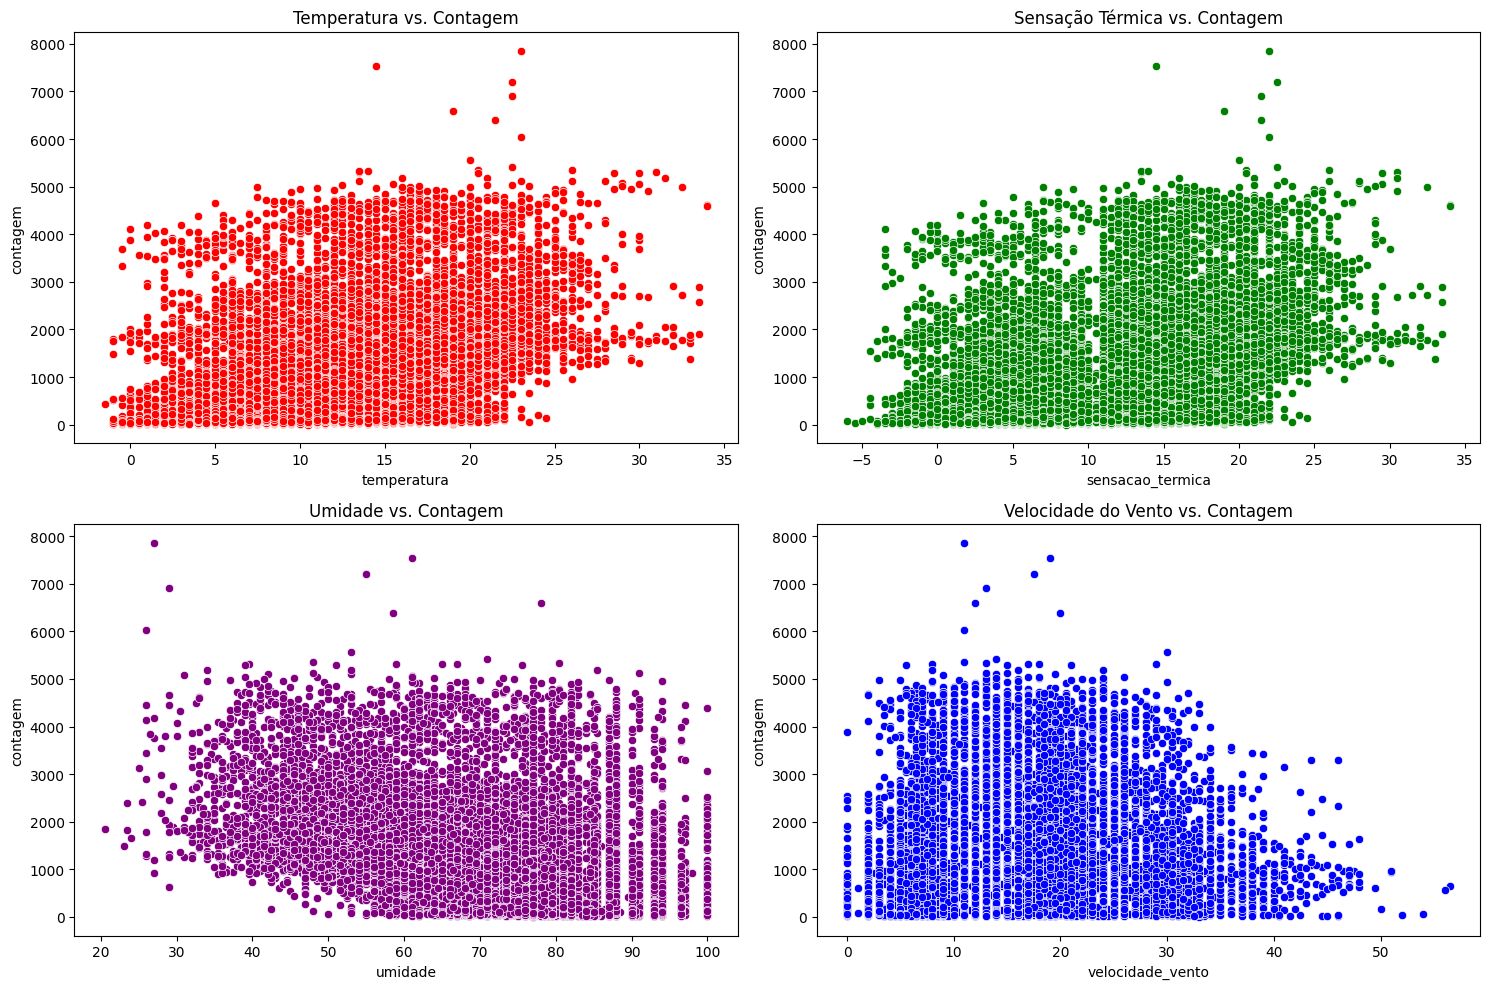

In [19]:
# prompt: gere quatro gráficos do tipo scatterplot das variáveis: temperatura, sensacao_termica, umidade, velocidade_vento com a coluna contagem no eixo y. deixar os gráficos na posição 2x2. cada gráfico deve ter um título.

import matplotlib.pyplot as plt
# Criando os subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Temperatura vs. Contagem
sns.scatterplot(x='temperatura', y='contagem', data=df_limpo, ax=axes[0, 0], color='red')
axes[0, 0].set_title('Temperatura vs. Contagem')

# Plot 2: Sensação Térmica vs. Contagem
sns.scatterplot(x='sensacao_termica', y='contagem', data=df_limpo, ax=axes[0, 1], color='green')
axes[0, 1].set_title('Sensação Térmica vs. Contagem')

# Plot 3: Umidade vs. Contagem
sns.scatterplot(x='umidade', y='contagem', data=df_limpo, ax=axes[1, 0], color='purple')
axes[1, 0].set_title('Umidade vs. Contagem')

# Plot 4: Velocidade do Vento vs. Contagem
sns.scatterplot(x='velocidade_vento', y='contagem', data=df_limpo, ax=axes[1, 1], color='blue')
axes[1, 1].set_title('Velocidade do Vento vs. Contagem')

# Ajustando o layout para evitar sobreposição
plt.tight_layout()

# Exibindo os gráficos
plt.show()


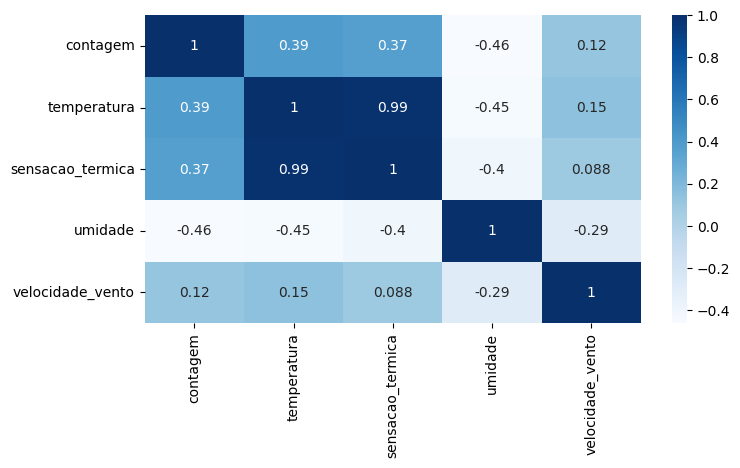

In [20]:
plt.figure(figsize=(8,4))

sns.heatmap(df_limpo.corr(numeric_only=True), annot=True, cmap='Blues')

plt.show()

## Explorando os dados categóricos

In [21]:
df_limpo.describe(include=[object])

,data_hora,clima,feriado,fim_de_semana,estacao
count,17414,17414,17414,17414,17414
unique,17414,6,2,2,4
top,2017-01-03 23:00:00,Céu limpo,Não,Não,Primavera
freq,1,6150,17030,12444,4394


In [24]:
for col in ['clima', 'feriado', 'fim_de_semana', 'estacao']:
  print(f'Coluna: {col}')
  print(df_limpo[col].unique())
  print('='*50, '\n')

Coluna: clima
['Nublado' 'Céu limpo' 'Parcialmente nublado' 'Chuva leve' 'Neve'
 'Chuva com trovoadas']

Coluna: feriado
['Não' 'Sim']

Coluna: fim_de_semana
['Sim' 'Não']

Coluna: estacao
['Inverno' 'Primavera' 'Verão' 'Outono']



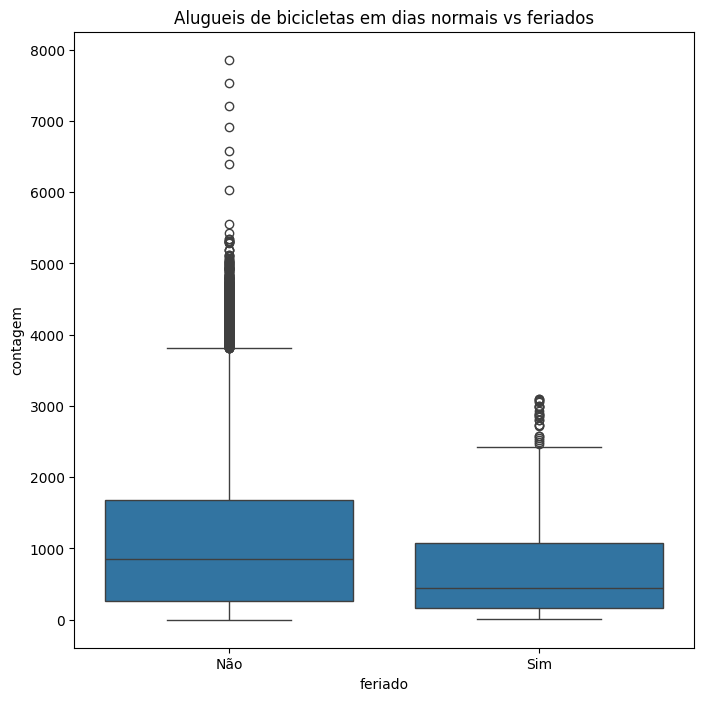

In [26]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df_limpo, x='feriado', y='contagem')
plt.title('Alugueis de bicicletas em dias normais vs feriados')
plt.show()

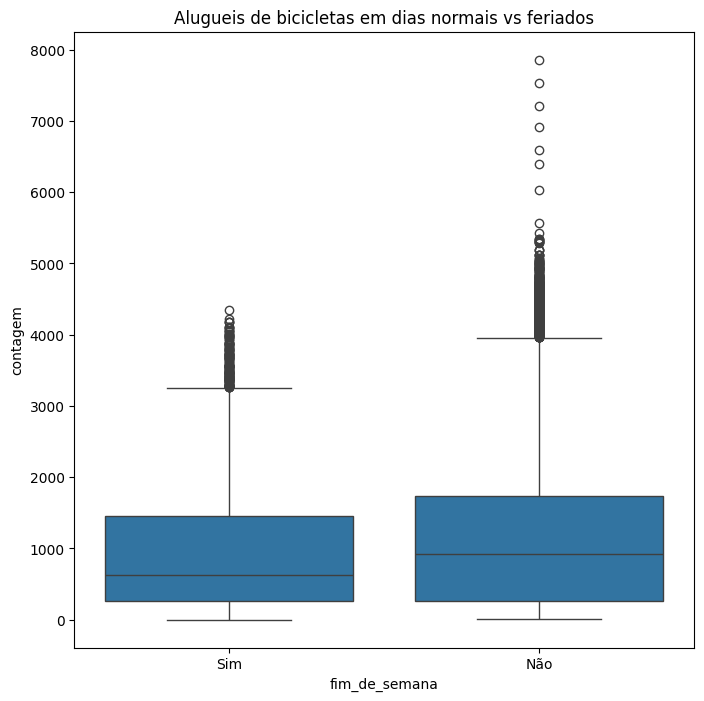

In [27]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df_limpo, x='fim_de_semana', y='contagem')
plt.title('Alugueis de bicicletas em dias normais vs feriados')
plt.show()

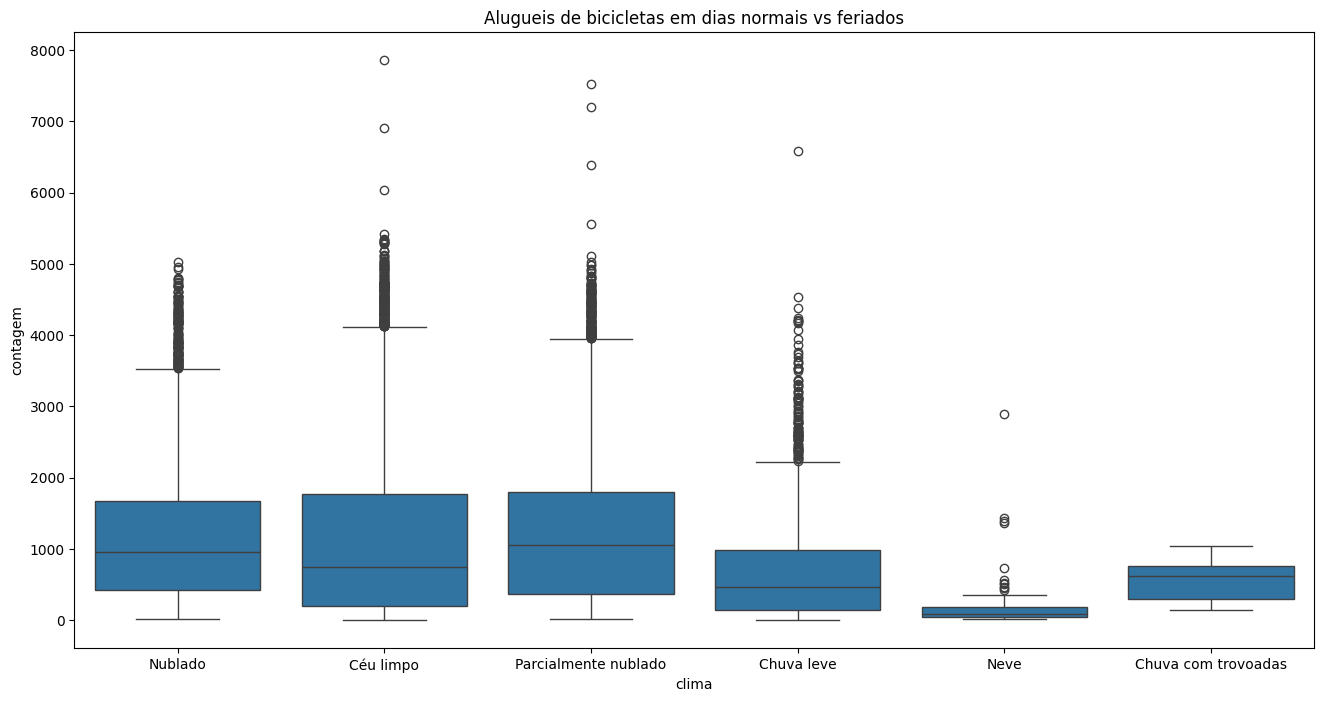

In [28]:
plt.figure(figsize=(16,8))
sns.boxplot(data=df_limpo, x='clima', y='contagem')
plt.title('Alugueis de bicicletas em dias normais vs feriados')
plt.show()

In [29]:
mediana_feriado = df_limpo.groupby('feriado')['contagem'].median()
mediana_feriado

,contagem
feriado,
Não,855.0
Sim,439.5


In [31]:
mediana_fim_de_semana = df_limpo.groupby('fim_de_semana')['contagem'].median()
mediana_fim_de_semana

,contagem
fim_de_semana,
Não,927.0
Sim,619.0


In [42]:
df_clima = df_limpo.groupby('clima')['contagem'].sum().reset_index().sort_values(by='contagem', ascending=False)
df_clima

,clima,contagem
2,Céu limpo,7146847
5,Parcialmente nublado,6965558
4,Nublado,4243887
1,Chuva leve,1526461
3,Neve,15051
0,Chuva com trovoadas,8168


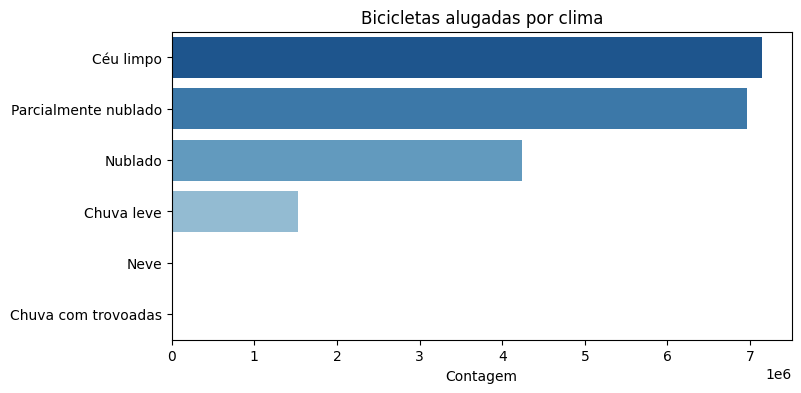

In [44]:
plt.figure(figsize=(8,4))
sns.barplot(data=df_clima, x='contagem',  y='clima', hue='clima', palette='Blues_r', orient='h')
plt.title('Bicicletas alugadas por clima')
plt.xlabel('Contagem')
plt.ylabel('')
plt.show()

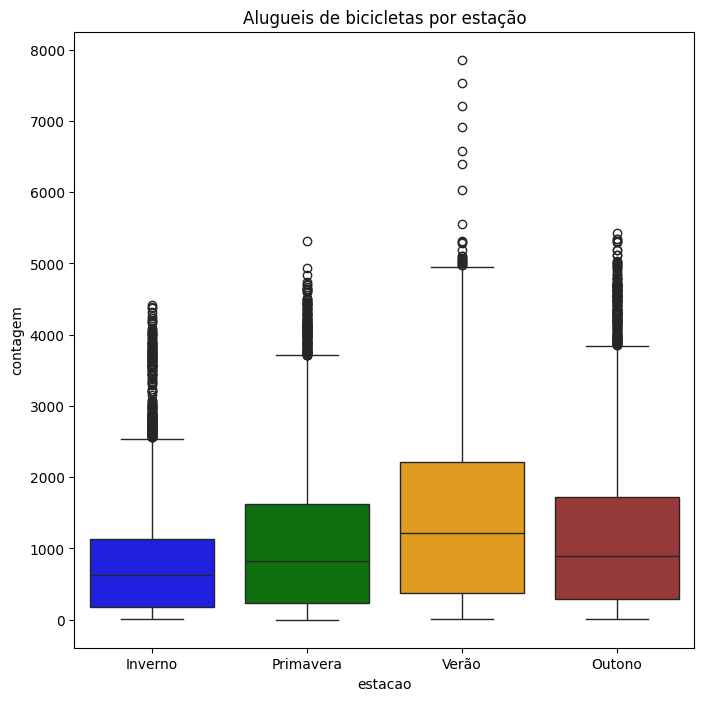

In [47]:
paleta = {'Primavera': 'green',
          'Verão': 'orange',
          'Outono': 'brown',
          'Inverno': 'blue'}

plt.figure(figsize=(8, 8))

sns.boxplot(data=df_limpo, x='estacao', y='contagem', hue='estacao', palette=paleta)
plt.title('Alugueis de bicicletas por estação')
plt.show()

In [48]:
df_limpo.groupby('estacao')['contagem'].median()

,contagem
estacao,
Inverno,632.0
Outono,898.0
Primavera,823.0
Verão,1214.0


In [52]:
from scipy.stats import mannwhitneyu

In [55]:
primavera = df_limpo[df_limpo['estacao'] == 'Primavera']['contagem']
outono = df_limpo[df_limpo['estacao'] == 'Outono']['contagem']

verao = df_limpo[df_limpo['estacao'] == 'Verao']['contagem']
inverno = df_limpo[df_limpo['estacao'] == 'Inverno']['contagem']

In [54]:
u_statistic, p_value = mannwhitneyu(primavera, outono, alternative='two-sided')
print(u_statistic, p_value)

9044682.5 0.0004762100221646296


In [56]:
u_statistic, p_value = mannwhitneyu(inverno, verao, alternative='two-sided')
print(u_statistic, p_value)

nan nan


<ipython-input-56-51825cb01189>:1: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  u_statistic, p_value = mannwhitneyu(inverno, verao, alternative='two-sided')
